In [1]:
from DCC import *
from Utils import *
from Plots import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
from collections import defaultdict
import shap

init_plotting()

dataset2name = {
    "Bala_classification_dataset.csv": "Bala Classification",
    "Bala_regression_dataset.csv": "Bala Regression",
    "bandgap.csv": "Bandgap",
    "BMDS_data.csv": "BMDS",
    "Crystal_structure.csv": "Crystal Structure",
    "Glass.csv": "Glass",
    "PUE.csv": "PUE",
}

from enum import Enum
from sklearn.datasets import make_classification


class PerturbationType(Enum):
    Deletion = "Deletion"
    AdditionLinear = "AdditionLinear"
    AdditionRand = "AdditionRand"
    ReplacementLinear = "ReplacementLinear"
    ReplacementRand = "ReplacementRand"

In [2]:
df = pd.read_csv("results/SHAP_results.csv")
df

,dataset,perturbation_type,perturbation_ratio,SHAP_feat,SHAP_feat_ratio,max_shap_feat,feat,DCC_pearson_matrix,Corr_pearson_matrix,DCC_spearman_matrix,...,DCC_mutual_info_matrix,Corr_mutual_info_matrix,DCC_js_corr_matrix,Corr_js_corr_matrix,DCC_wd_corr_matrix,Corr_wd_corr_matrix,DCC_xi_matrix,Corr_xi_matrix,DCC_dcor_matrix,Corr_dcor_matrix
0,Bala_classification_dataset.csv,Deletion,0.05,0.031496,0.297431,Mendeleev_Number,Compound,1.000000,-0.100841,1.000000,...,1.000000,0.024555,1.000000,0.313147,1.000000,0.527515,0.357143,0.180511,1.000000,0.135073
1,Bala_classification_dataset.csv,Deletion,0.05,0.027763,0.262175,Mendeleev_Number,x(BiMe1Me2)O3,0.928571,-0.395085,1.000000,...,0.928571,0.077559,1.000000,0.528265,1.000000,0.568063,0.500000,0.229435,1.000000,0.377583
2,Bala_classification_dataset.csv,Deletion,0.05,0.036863,0.348111,Mendeleev_Number,Me1,0.928571,-0.094558,1.000000,...,1.000000,0.091084,1.000000,0.320797,1.000000,0.437985,0.214286,0.204973,1.000000,0.175186
3,Bala_classification_dataset.csv,Deletion,0.05,0.026647,0.251633,Mendeleev_Number,Me2,0.928571,-0.246314,1.000000,...,1.000000,0.025397,1.000000,0.390185,1.000000,0.420690,0.214286,0.119355,1.000000,0.253483
4,Bala_classification_dataset.csv,Deletion,0.05,0.009097,0.085910,Mendeleev_Number,frac-Me1,1.000000,0.017028,1.000000,...,1.000000,0.012468,1.000000,0.547022,1.000000,0.902350,0.142857,-0.002957,1.000000,0.074559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,PUE.csv,ReplacementRand,0.15,0.105647,1.000000,ZS_SS_VSA_EState8,ZS_SS_VSA_EState8,0.571429,-0.532048,0.761905,...,0.761905,0.186937,0.857143,0.431426,0.952381,0.402429,0.380952,0.326774,0.666667,0.493784
4616,PUE.csv,ReplacementRand,0.15,0.007102,0.067225,ZS_SS_VSA_EState8,ZS_SS_PEOE_VSA8,0.904762,0.226079,0.952381,...,0.904762,0.137900,0.809524,0.371876,0.952381,0.410280,0.571429,0.347391,0.904762,0.296191
4617,PUE.csv,ReplacementRand,0.15,0.018134,0.171648,ZS_SS_VSA_EState8,ZS_log_HS_NumNHCO_norm,0.333333,-0.229745,0.619048,...,0.952381,0.102717,0.904762,0.230718,0.952381,0.199345,0.238095,0.086455,0.571429,0.274572
4618,PUE.csv,ReplacementRand,0.15,0.019256,0.182265,ZS_SS_VSA_EState8,ZS_FC_NumHAcceptors_norm,0.714286,0.321769,0.809524,...,0.952381,0.130991,0.904762,0.205769,0.952381,0.105404,0.523810,0.085579,0.857143,0.323027


In [3]:
df = df[df["max_shap_feat"] != df["feat"]]
df

,dataset,perturbation_type,perturbation_ratio,SHAP_feat,SHAP_feat_ratio,max_shap_feat,feat,DCC_pearson_matrix,Corr_pearson_matrix,DCC_spearman_matrix,...,DCC_mutual_info_matrix,Corr_mutual_info_matrix,DCC_js_corr_matrix,Corr_js_corr_matrix,DCC_wd_corr_matrix,Corr_wd_corr_matrix,DCC_xi_matrix,Corr_xi_matrix,DCC_dcor_matrix,Corr_dcor_matrix
0,Bala_classification_dataset.csv,Deletion,0.05,0.031496,0.297431,Mendeleev_Number,Compound,1.000000,-0.100841,1.000000,...,1.000000,0.024555,1.000000,0.313147,1.000000,0.527515,0.357143,0.180511,1.000000,0.135073
1,Bala_classification_dataset.csv,Deletion,0.05,0.027763,0.262175,Mendeleev_Number,x(BiMe1Me2)O3,0.928571,-0.395085,1.000000,...,0.928571,0.077559,1.000000,0.528265,1.000000,0.568063,0.500000,0.229435,1.000000,0.377583
2,Bala_classification_dataset.csv,Deletion,0.05,0.036863,0.348111,Mendeleev_Number,Me1,0.928571,-0.094558,1.000000,...,1.000000,0.091084,1.000000,0.320797,1.000000,0.437985,0.214286,0.204973,1.000000,0.175186
3,Bala_classification_dataset.csv,Deletion,0.05,0.026647,0.251633,Mendeleev_Number,Me2,0.928571,-0.246314,1.000000,...,1.000000,0.025397,1.000000,0.390185,1.000000,0.420690,0.214286,0.119355,1.000000,0.253483
4,Bala_classification_dataset.csv,Deletion,0.05,0.009097,0.085910,Mendeleev_Number,frac-Me1,1.000000,0.017028,1.000000,...,1.000000,0.012468,1.000000,0.547022,1.000000,0.902350,0.142857,-0.002957,1.000000,0.074559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4614,PUE.csv,ReplacementRand,0.15,0.041932,0.396910,ZS_SS_VSA_EState8,ZS_HS_BertzCT,0.523810,0.017525,0.666667,...,0.952381,0.110179,0.952381,0.378569,0.904762,0.231328,0.666667,0.147968,0.666667,0.175821
4616,PUE.csv,ReplacementRand,0.15,0.007102,0.067225,ZS_SS_VSA_EState8,ZS_SS_PEOE_VSA8,0.904762,0.226079,0.952381,...,0.904762,0.137900,0.809524,0.371876,0.952381,0.410280,0.571429,0.347391,0.904762,0.296191
4617,PUE.csv,ReplacementRand,0.15,0.018134,0.171648,ZS_SS_VSA_EState8,ZS_log_HS_NumNHCO_norm,0.333333,-0.229745,0.619048,...,0.952381,0.102717,0.904762,0.230718,0.952381,0.199345,0.238095,0.086455,0.571429,0.274572
4618,PUE.csv,ReplacementRand,0.15,0.019256,0.182265,ZS_SS_VSA_EState8,ZS_FC_NumHAcceptors_norm,0.714286,0.321769,0.809524,...,0.952381,0.130991,0.904762,0.205769,0.952381,0.105404,0.523810,0.085579,0.857143,0.323027


In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
df["perturbation_type"] = LabelEncoder().fit_transform(df["perturbation_type"])

df.drop(labels=["dataset", "feat"], axis=1, inplace=True)

df

C:\Users\11946\AppData\Local\Temp\ipykernel_35200\1636627435.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["perturbation_type"] = LabelEncoder().fit_transform(df["perturbation_type"])
C:\Users\11946\AppData\Local\Temp\ipykernel_35200\1636627435.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(labels=["dataset", "feat"], axis=1, inplace=True)


,perturbation_type,perturbation_ratio,SHAP_feat,SHAP_feat_ratio,max_shap_feat,DCC_pearson_matrix,Corr_pearson_matrix,DCC_spearman_matrix,Corr_spearman_matrix,DCC_kendall_matrix,...,DCC_mutual_info_matrix,Corr_mutual_info_matrix,DCC_js_corr_matrix,Corr_js_corr_matrix,DCC_wd_corr_matrix,Corr_wd_corr_matrix,DCC_xi_matrix,Corr_xi_matrix,DCC_dcor_matrix,Corr_dcor_matrix
0,2,0.05,0.031496,0.297431,Mendeleev_Number,1.000000,-0.100841,1.000000,-0.122882,1.000000,...,1.000000,0.024555,1.000000,0.313147,1.000000,0.527515,0.357143,0.180511,1.000000,0.135073
1,2,0.05,0.027763,0.262175,Mendeleev_Number,0.928571,-0.395085,1.000000,-0.377181,1.000000,...,0.928571,0.077559,1.000000,0.528265,1.000000,0.568063,0.500000,0.229435,1.000000,0.377583
2,2,0.05,0.036863,0.348111,Mendeleev_Number,0.928571,-0.094558,1.000000,-0.132373,1.000000,...,1.000000,0.091084,1.000000,0.320797,1.000000,0.437985,0.214286,0.204973,1.000000,0.175186
3,2,0.05,0.026647,0.251633,Mendeleev_Number,0.928571,-0.246314,1.000000,-0.264356,1.000000,...,1.000000,0.025397,1.000000,0.390185,1.000000,0.420690,0.214286,0.119355,1.000000,0.253483
4,2,0.05,0.009097,0.085910,Mendeleev_Number,1.000000,0.017028,1.000000,0.006312,1.000000,...,1.000000,0.012468,1.000000,0.547022,1.000000,0.902350,0.142857,-0.002957,1.000000,0.074559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4614,4,0.15,0.041932,0.396910,ZS_SS_VSA_EState8,0.523810,0.017525,0.666667,-0.022470,0.904762,...,0.952381,0.110179,0.952381,0.378569,0.904762,0.231328,0.666667,0.147968,0.666667,0.175821
4616,4,0.15,0.007102,0.067225,ZS_SS_VSA_EState8,0.904762,0.226079,0.952381,0.103775,0.952381,...,0.904762,0.137900,0.809524,0.371876,0.952381,0.410280,0.571429,0.347391,0.904762,0.296191
4617,4,0.15,0.018134,0.171648,ZS_SS_VSA_EState8,0.333333,-0.229745,0.619048,-0.177317,0.904762,...,0.952381,0.102717,0.904762,0.230718,0.952381,0.199345,0.238095,0.086455,0.571429,0.274572
4618,4,0.15,0.019256,0.182265,ZS_SS_VSA_EState8,0.714286,0.321769,0.809524,0.228038,0.952381,...,0.952381,0.130991,0.904762,0.205769,0.952381,0.105404,0.523810,0.085579,0.857143,0.323027


In [5]:
df.columns.to_list()

['perturbation_type',
 'perturbation_ratio',
 'SHAP_feat',
 'SHAP_feat_ratio',
 'max_shap_feat',
 'DCC_pearson_matrix',
 'Corr_pearson_matrix',
 'DCC_spearman_matrix',
 'Corr_spearman_matrix',
 'DCC_kendall_matrix',
 'Corr_kendall_matrix',
 'DCC_mutual_info_matrix',
 'Corr_mutual_info_matrix',
 'DCC_js_corr_matrix',
 'Corr_js_corr_matrix',
 'DCC_wd_corr_matrix',
 'Corr_wd_corr_matrix',
 'DCC_xi_matrix',
 'Corr_xi_matrix',
 'DCC_dcor_matrix',
 'Corr_dcor_matrix']

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 [Text(0, 0.5, '$SHAP_{F_{i}}$'),
  Text(0, 1.5, '$SHAP_{F_{i}} \\%$'),
  Text(0, 2.5, '$\\theta$'),
  Text(0, 3.5, '$DCC(PS)_{F_{i}}$'),
  Text(0, 4.5, '$DCC(SP)_{F_{i}}$'),
  Text(0, 5.5, '$DCC(KD)_{F_{i}}$'),
  Text(0, 6.5, '$DCC(MI)_{F_{i}}$'),
  Text(0, 7.5, '$DCC(JS)_{F_{i}}$'),
  Text(0, 8.5, '$DCC(WD)_{F_{i}}$'),
  Text(0, 9.5, '$DCC(XI)_{F_{i}}$'),
  Text(0, 10.5, '$DCC(DC)_{F_{i}}$'),
  Text(0, 11.5, '$PS_{F_{i}}$'),
  Text(0, 12.5, '$SP_{F_{i}}$'),
  Text(0, 13.5, '$KD_{F_{i}}$'),
  Text(0, 14.5, '$MI_{F_{i}}$'),
  Text(0, 15.5, '$JS_{F_{i}}$'),
  Text(0, 16.5, '$WD_{F_{i}}$'),
  Text(0, 17.5, '$XI_{F_{i}}$'),
  Text(0, 18.5, '$DC_{F_{i}}$')])

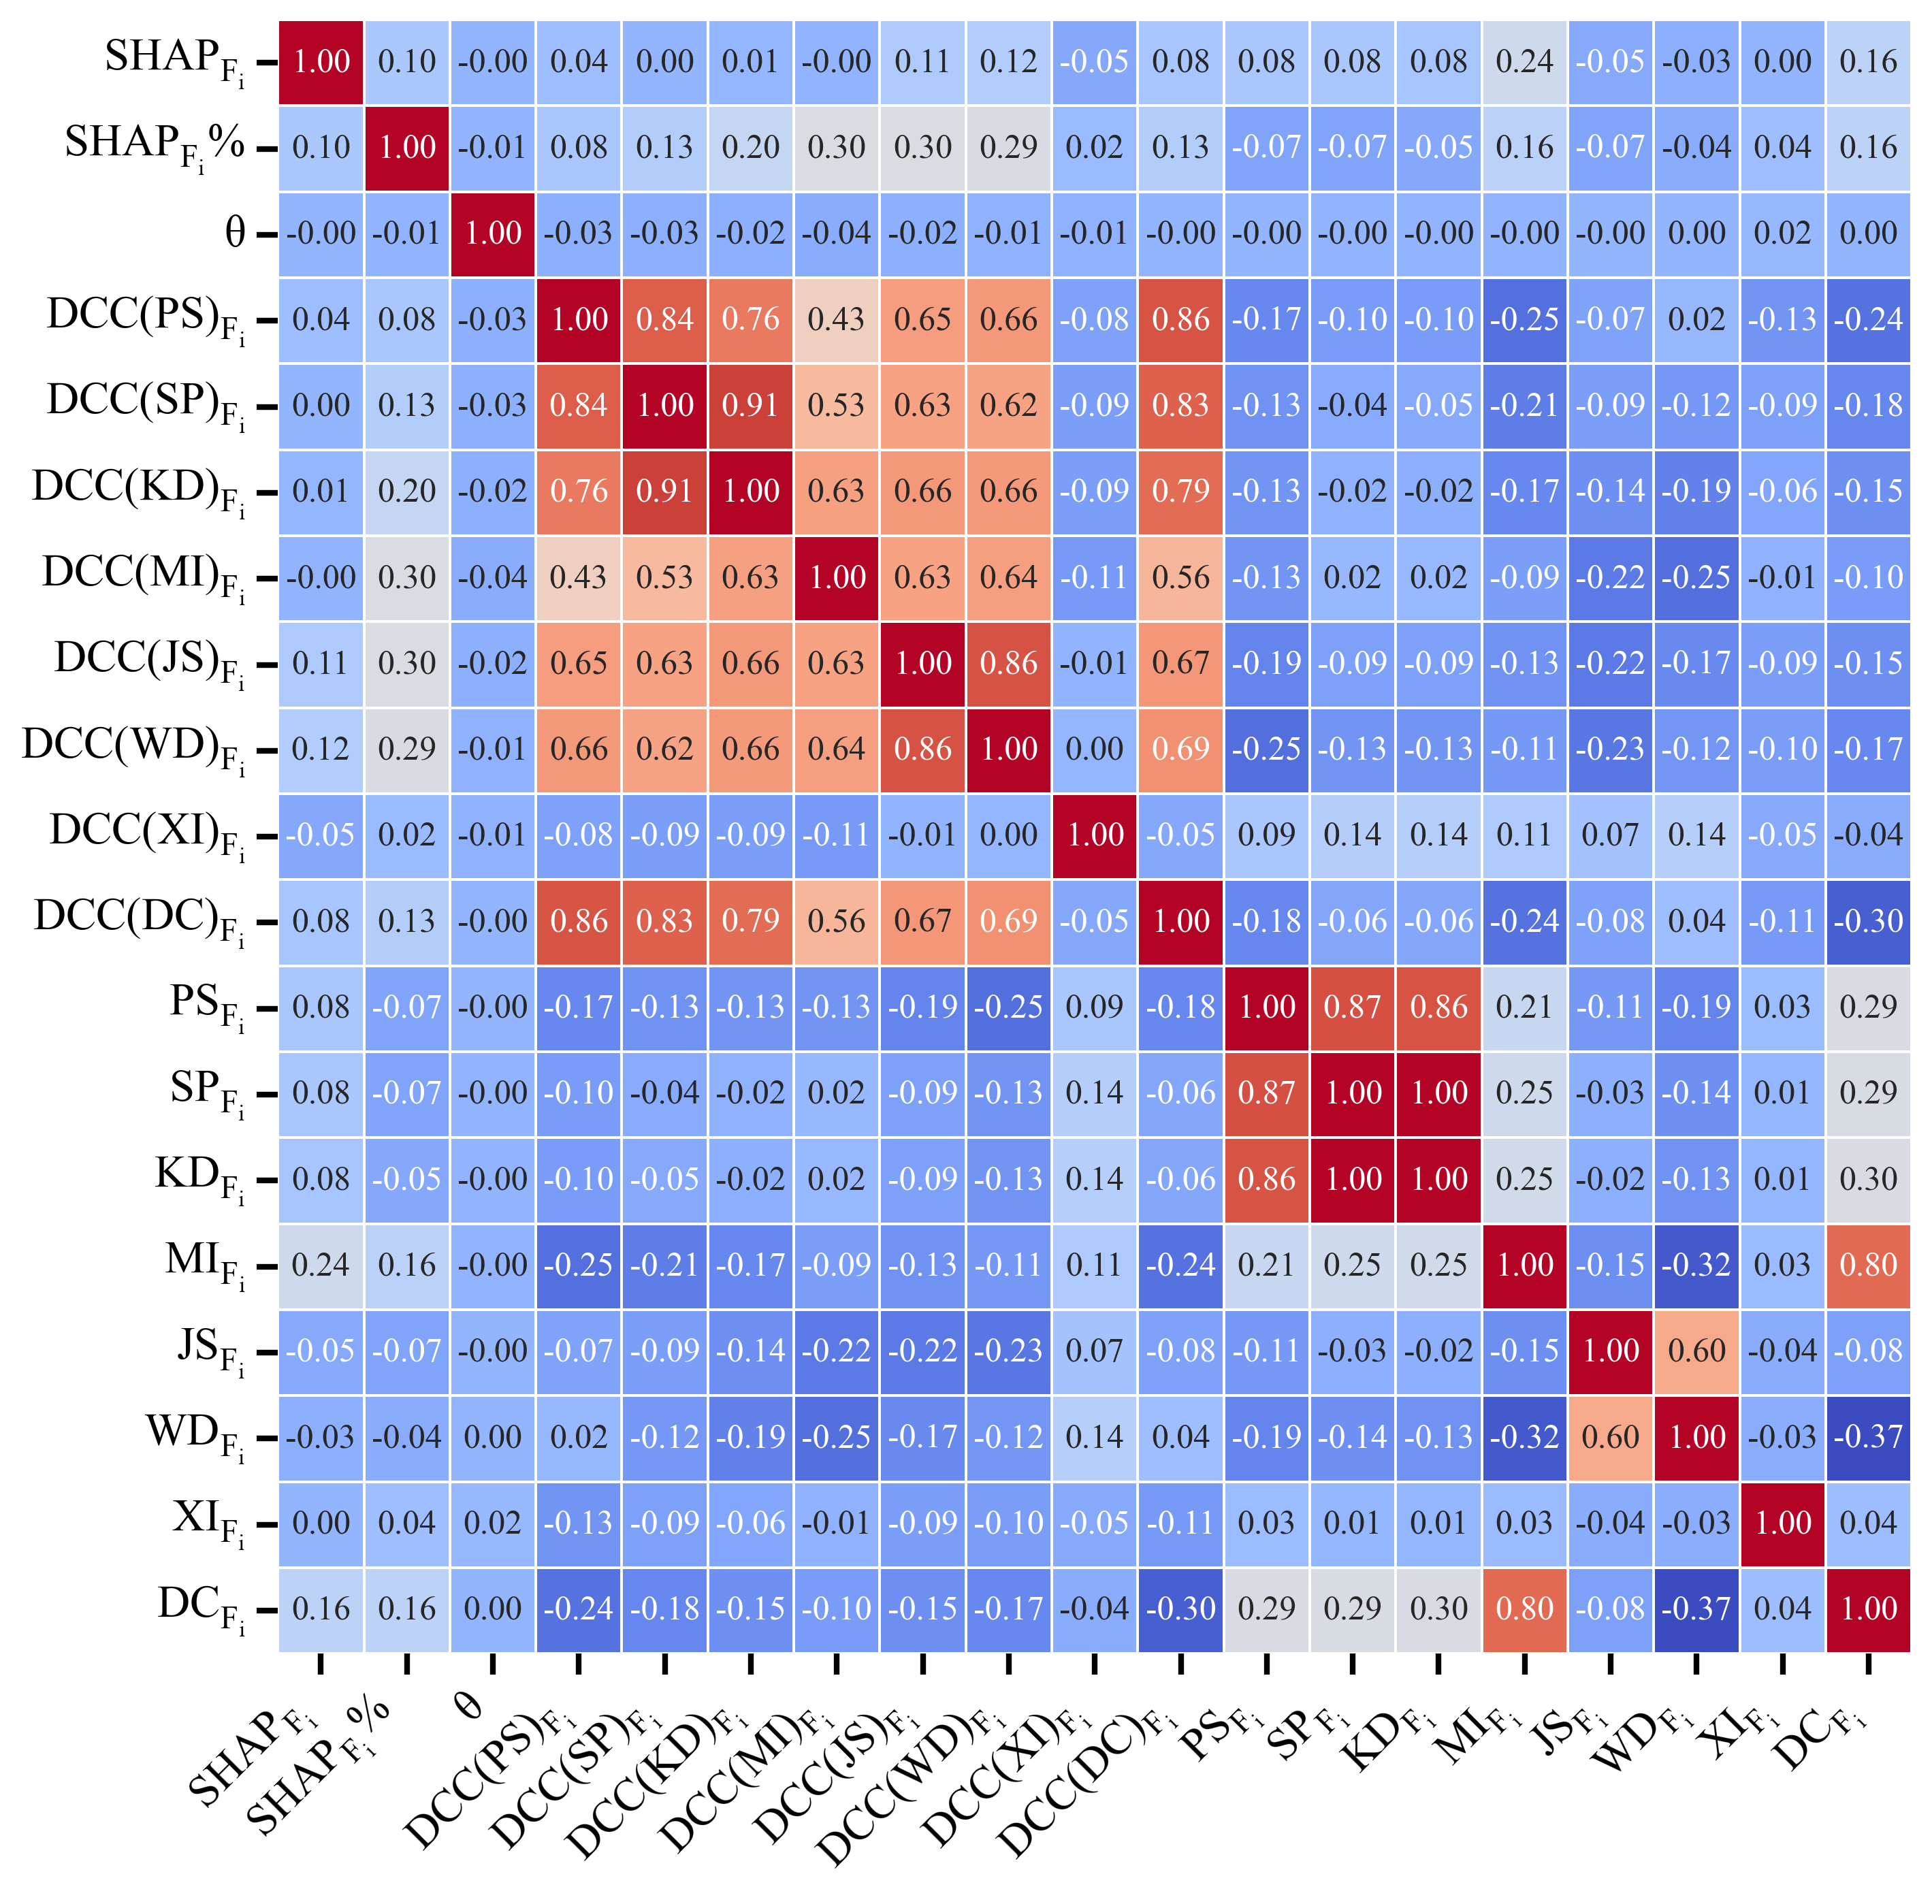

In [6]:
reorder_cols = [
    "SHAP_feat",
    "SHAP_feat_ratio",
    # "perturbation_type",
    "perturbation_ratio",
    "DCC_pearson_matrix",
    "DCC_spearman_matrix",
    "DCC_kendall_matrix",
    "DCC_mutual_info_matrix",
    "DCC_js_corr_matrix",
    "DCC_wd_corr_matrix",
    "DCC_xi_matrix",
    "DCC_dcor_matrix",
    "Corr_pearson_matrix",
    "Corr_spearman_matrix",
    "Corr_kendall_matrix",
    "Corr_mutual_info_matrix",
    "Corr_js_corr_matrix",
    "Corr_wd_corr_matrix",
    "Corr_xi_matrix",
    "Corr_dcor_matrix",
]

fig, ax = plt.subplots(figsize=(14, 10))
custom_labels = [
    r"$SHAP_{F_{i}}$",
    r"$SHAP_{F_{i}} \%$",
    # "Ptb Type",
    r"$\theta$",
    r"$DCC(PS)_{F_{i}}$",
    r"$DCC(SP)_{F_{i}}$",
    r"$DCC(KD)_{F_{i}}$",
    r"$DCC(MI)_{F_{i}}$",
    r"$DCC(JS)_{F_{i}}$",
    r"$DCC(WD)_{F_{i}}$",
    r"$DCC(XI)_{F_{i}}$",
    r"$DCC(DC)_{F_{i}}$",
    r"$PS_{F_{i}}$",
    r"$SP_{F_{i}}$",
    r"$KD_{F_{i}}$",
    r"$MI_{F_{i}}$",
    r"$JS_{F_{i}}$",
    r"$WD_{F_{i}}$",
    r"$XI_{F_{i}}$",
    r"$DC_{F_{i}}$",
]
sns.heatmap(
    df[reorder_cols].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    xticklabels=custom_labels,
    yticklabels=custom_labels,
    cbar=False,
    square=True,    
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

In [7]:
sel_cols = [
    "SHAP_feat",
    "SHAP_feat_ratio",
    # "perturbation_type",
    "perturbation_ratio",
    "DCC_pearson_matrix",
    "DCC_spearman_matrix",
    "DCC_kendall_matrix",
    "DCC_mutual_info_matrix",
    "DCC_js_corr_matrix",
    "DCC_wd_corr_matrix",
    "DCC_xi_matrix",
    "DCC_dcor_matrix",
    "Corr_pearson_matrix",
    "Corr_spearman_matrix",
    "Corr_kendall_matrix",
    "Corr_mutual_info_matrix",
    "Corr_js_corr_matrix",
    "Corr_wd_corr_matrix",
    "Corr_xi_matrix",
    "Corr_dcor_matrix",
]

X_cols = [
    # "perturbation_type",
    "perturbation_ratio",
    "DCC_pearson_matrix",
    "DCC_spearman_matrix",
    "DCC_kendall_matrix",
    "DCC_mutual_info_matrix",
    "DCC_js_corr_matrix",
    "DCC_wd_corr_matrix",
    "DCC_xi_matrix",
    "DCC_dcor_matrix",
    "Corr_pearson_matrix",
    "Corr_spearman_matrix",
    "Corr_kendall_matrix",
    "Corr_mutual_info_matrix",
    "Corr_js_corr_matrix",
    "Corr_wd_corr_matrix",
    "Corr_xi_matrix",
    "Corr_dcor_matrix",
]

In [8]:
df = df[sel_cols]

In [9]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

eps = 1e-6
df["SHAP_feat"] = np.log10(df["SHAP_feat"].values + 1 + eps)

df["SHAP_feat_boxcox"] = boxcox(df["SHAP_feat"].values)[0]
df["SHAP_feat_ratio_boxcox"] = boxcox(df["SHAP_feat_ratio"].values + eps)[0]

C:\Users\11946\AppData\Local\Temp\ipykernel_35200\2347986744.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SHAP_feat"] = np.log10(df["SHAP_feat"].values + 1 + eps)
C:\Users\11946\AppData\Local\Temp\ipykernel_35200\2347986744.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SHAP_feat_boxcox"] = boxcox(df["SHAP_feat"].values)[0]


In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from IPython.display import  display

def cross_validate_model(model, X, y, cv=5):    

    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        scores.append(score)
    return np.mean(scores), np.std(scores)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

def plot_rfecv(X, y, estimator, cv=5, scoring="r2"):
    """
    使用 RFECV (递归特征消除 + 交叉验证) 并绘制性能变化图。

    Parameters:
    - X: 特征数据 (ndarray or DataFrame)
    - y: 标签数据
    - estimator: 基学习器 (如 RandomForestRegressor, SVR 等)
    - cv: 交叉验证折数 (默认 5)
    - scoring: 模型评估指标 (默认 "r2")
    """
    # 定义交叉验证器
    cv_splitter = KFold(n_splits=cv, shuffle=True, random_state=42)

    # RFECV 自动递归消除 + CV
    selector = RFECV(estimator, step=1, cv=cv_splitter,
                     scoring=scoring, n_jobs=-1)
    selector.fit(X, y)
    return selector, selector.cv_results_

Used cols ['SHAP_feat', 'perturbation_ratio', 'DCC_pearson_matrix', 'DCC_spearman_matrix', 'DCC_kendall_matrix', 'DCC_mutual_info_matrix', 'DCC_js_corr_matrix', 'DCC_wd_corr_matrix', 'DCC_xi_matrix', 'DCC_dcor_matrix', 'Corr_pearson_matrix', 'Corr_spearman_matrix', 'Corr_kendall_matrix', 'Corr_mutual_info_matrix', 'Corr_js_corr_matrix', 'Corr_wd_corr_matrix', 'Corr_xi_matrix', 'Corr_dcor_matrix']
Selected features: ['DCC_kendall_matrix', 'DCC_mutual_info_matrix', 'DCC_js_corr_matrix', 'DCC_wd_corr_matrix', 'DCC_xi_matrix', 'Corr_pearson_matrix', 'Corr_spearman_matrix', 'Corr_kendall_matrix', 'Corr_mutual_info_matrix', 'Corr_js_corr_matrix', 'Corr_wd_corr_matrix', 'Corr_xi_matrix', 'Corr_dcor_matrix']
Number of selected features: 13
Used cols ['SHAP_feat_ratio', 'perturbation_ratio', 'DCC_pearson_matrix', 'DCC_spearman_matrix', 'DCC_kendall_matrix', 'DCC_mutual_info_matrix', 'DCC_js_corr_matrix', 'DCC_wd_corr_matrix', 'DCC_xi_matrix', 'DCC_dcor_matrix', 'Corr_pearson_matrix', 'Corr_spea

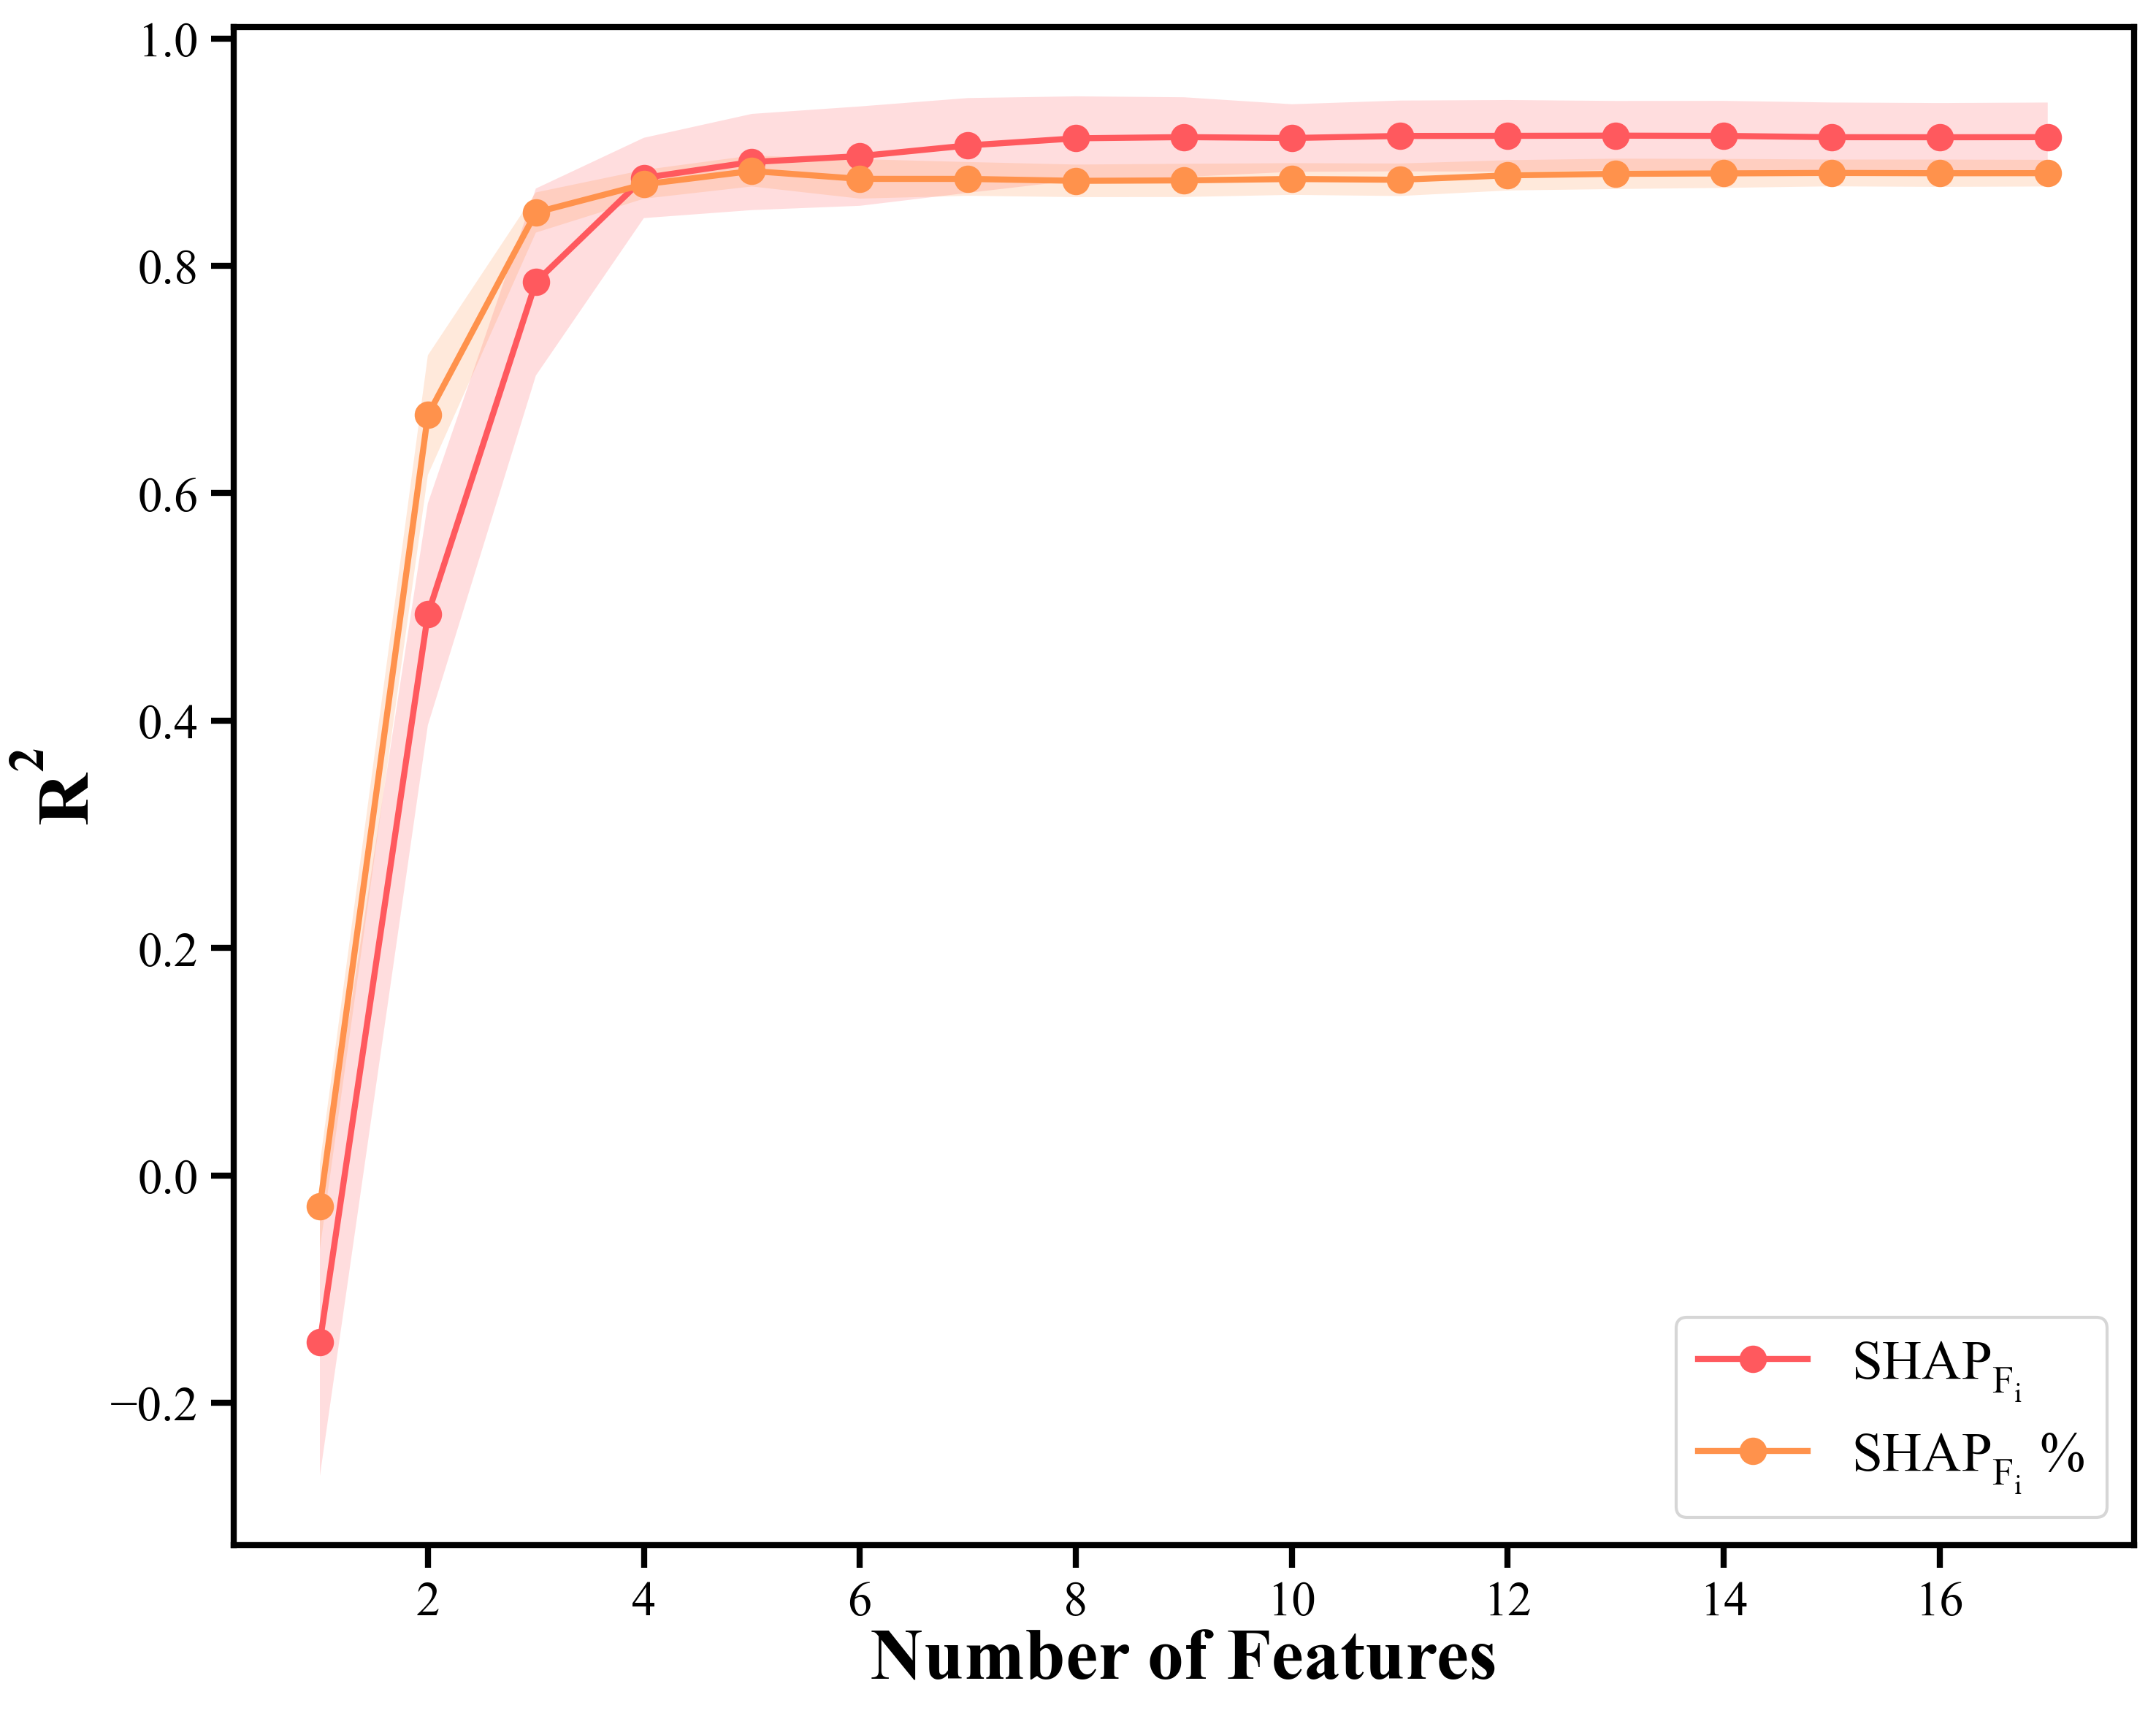

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))

# "SHAP_feat",
# "SHAP_feat_ratio",

select_cols = ["SHAP_feat"] + X_cols
exp_df = df[select_cols].copy()
print("Used cols", exp_df.columns.tolist())
X = exp_df[X_cols]
y = exp_df["SHAP_feat"]
model = RandomForestRegressor(n_estimators=500, random_state=42)
selector1, scores1 = plot_rfecv(X, y, model)
selector1_features = X.columns[selector1.support_]
print("Selected features:", selector1_features.tolist())
print("Number of selected features:", len(selector1_features))
np.save("results/feature_selection_scores-2-1.npy", scores1)

select_cols = ["SHAP_feat_ratio"] + X_cols
exp_df = df[select_cols].copy()
print("Used cols", exp_df.columns.tolist())
X = exp_df[X_cols]
y = exp_df["SHAP_feat_ratio"]
model = RandomForestRegressor(n_estimators=500, random_state=42)
selector2, scores2 = plot_rfecv(X, y, model)
selector2_features = X.columns[selector2.support_]
print("Selected features:", selector2_features.tolist())
print("Number of selected features:", len(selector2_features))
np.save("results/feature_selection_scores-2-2.npy", scores2)

# plt.ylim(0.8, 1)
plt.xlabel('Number of Features')
plt.ylabel(r'$R^2$')
ax.plot(range(1, len(scores1['mean_test_score']) + 1), scores1['mean_test_score'], marker="o")
ax.plot(range(1, len(scores2['mean_test_score']) + 1), scores2['mean_test_score'], marker="o")
plt.legend([r"$SHAP_{F_i}$", r"$SHAP_{F_i}$ %"], loc='lower right', fontsize=18)
std_scores = scores1['std_test_score']
ax.fill_between(range(1, len(scores1['mean_test_score']) + 1),
                scores1['mean_test_score'] - std_scores,
                scores1['mean_test_score'] + std_scores, alpha=0.2)
std_scores = scores2['std_test_score']
ax.fill_between(range(1, len(scores2['mean_test_score']) + 1),
                scores2['mean_test_score'] - std_scores,
                scores2['mean_test_score'] + std_scores, alpha=0.2)
plt.tight_layout()
plt.savefig("plots/feature_selection-2.png", dpi=300, bbox_inches='tight')
plt.show()

In [13]:
selector1_features = set(selector1_features)
selector2_features = set(selector2_features)
print("Common features:", list(selector1_features & selector2_features))
print("len common features:", len(selector1_features & selector2_features))

Common features: ['Corr_spearman_matrix', 'Corr_js_corr_matrix', 'Corr_dcor_matrix', 'Corr_mutual_info_matrix', 'Corr_wd_corr_matrix']
len common features: 5


In [14]:
all_features = set(selector1_features) | set(selector2_features)
print("All features:", list(all_features))
print("len all features:", len(all_features))

All features: ['Corr_kendall_matrix', 'Corr_spearman_matrix', 'Corr_js_corr_matrix', 'Corr_wd_corr_matrix', 'DCC_wd_corr_matrix', 'Corr_pearson_matrix', 'DCC_xi_matrix', 'Corr_dcor_matrix', 'Corr_mutual_info_matrix', 'Corr_xi_matrix', 'DCC_kendall_matrix', 'DCC_mutual_info_matrix', 'DCC_js_corr_matrix']
len all features: 13


In [15]:
top_k = 3
ranking1 = np.argsort(selector1.ranking_)
ranking2 = np.argsort(selector2.ranking_)
selected_features1 = X.columns[ranking1[:top_k]]
selected_features2 = X.columns[ranking2[:top_k]]
print("Top 5 features from SHAP_feat:", selected_features1.tolist())
print("Top 5 features from SHAP_feat_ratio:", selected_features2.tolist())

Top 5 features from SHAP_feat: ['Corr_dcor_matrix', 'DCC_kendall_matrix', 'DCC_mutual_info_matrix']
Top 5 features from SHAP_feat_ratio: ['Corr_dcor_matrix', 'Corr_wd_corr_matrix', 'Corr_js_corr_matrix']


In [16]:
list(set(selected_features1) | set(selected_features2))

['Corr_js_corr_matrix',
 'Corr_wd_corr_matrix',
 'DCC_kendall_matrix',
 'DCC_mutual_info_matrix',
 'Corr_dcor_matrix']

Used cols ['SHAP_feat_boxcox', 'perturbation_ratio', 'DCC_pearson_matrix', 'DCC_spearman_matrix', 'DCC_kendall_matrix', 'DCC_mutual_info_matrix', 'DCC_js_corr_matrix', 'DCC_wd_corr_matrix', 'DCC_xi_matrix', 'DCC_dcor_matrix', 'Corr_pearson_matrix', 'Corr_spearman_matrix', 'Corr_kendall_matrix', 'Corr_mutual_info_matrix', 'Corr_js_corr_matrix', 'Corr_wd_corr_matrix', 'Corr_xi_matrix', 'Corr_dcor_matrix']
Selected features: ['DCC_pearson_matrix', 'DCC_spearman_matrix', 'DCC_mutual_info_matrix', 'DCC_js_corr_matrix', 'DCC_wd_corr_matrix', 'DCC_xi_matrix', 'DCC_dcor_matrix', 'Corr_pearson_matrix', 'Corr_spearman_matrix', 'Corr_kendall_matrix', 'Corr_mutual_info_matrix', 'Corr_js_corr_matrix', 'Corr_wd_corr_matrix', 'Corr_xi_matrix', 'Corr_dcor_matrix']
Number of selected features: 15
Used cols ['SHAP_feat_ratio_boxcox', 'perturbation_ratio', 'DCC_pearson_matrix', 'DCC_spearman_matrix', 'DCC_kendall_matrix', 'DCC_mutual_info_matrix', 'DCC_js_corr_matrix', 'DCC_wd_corr_matrix', 'DCC_xi_matri

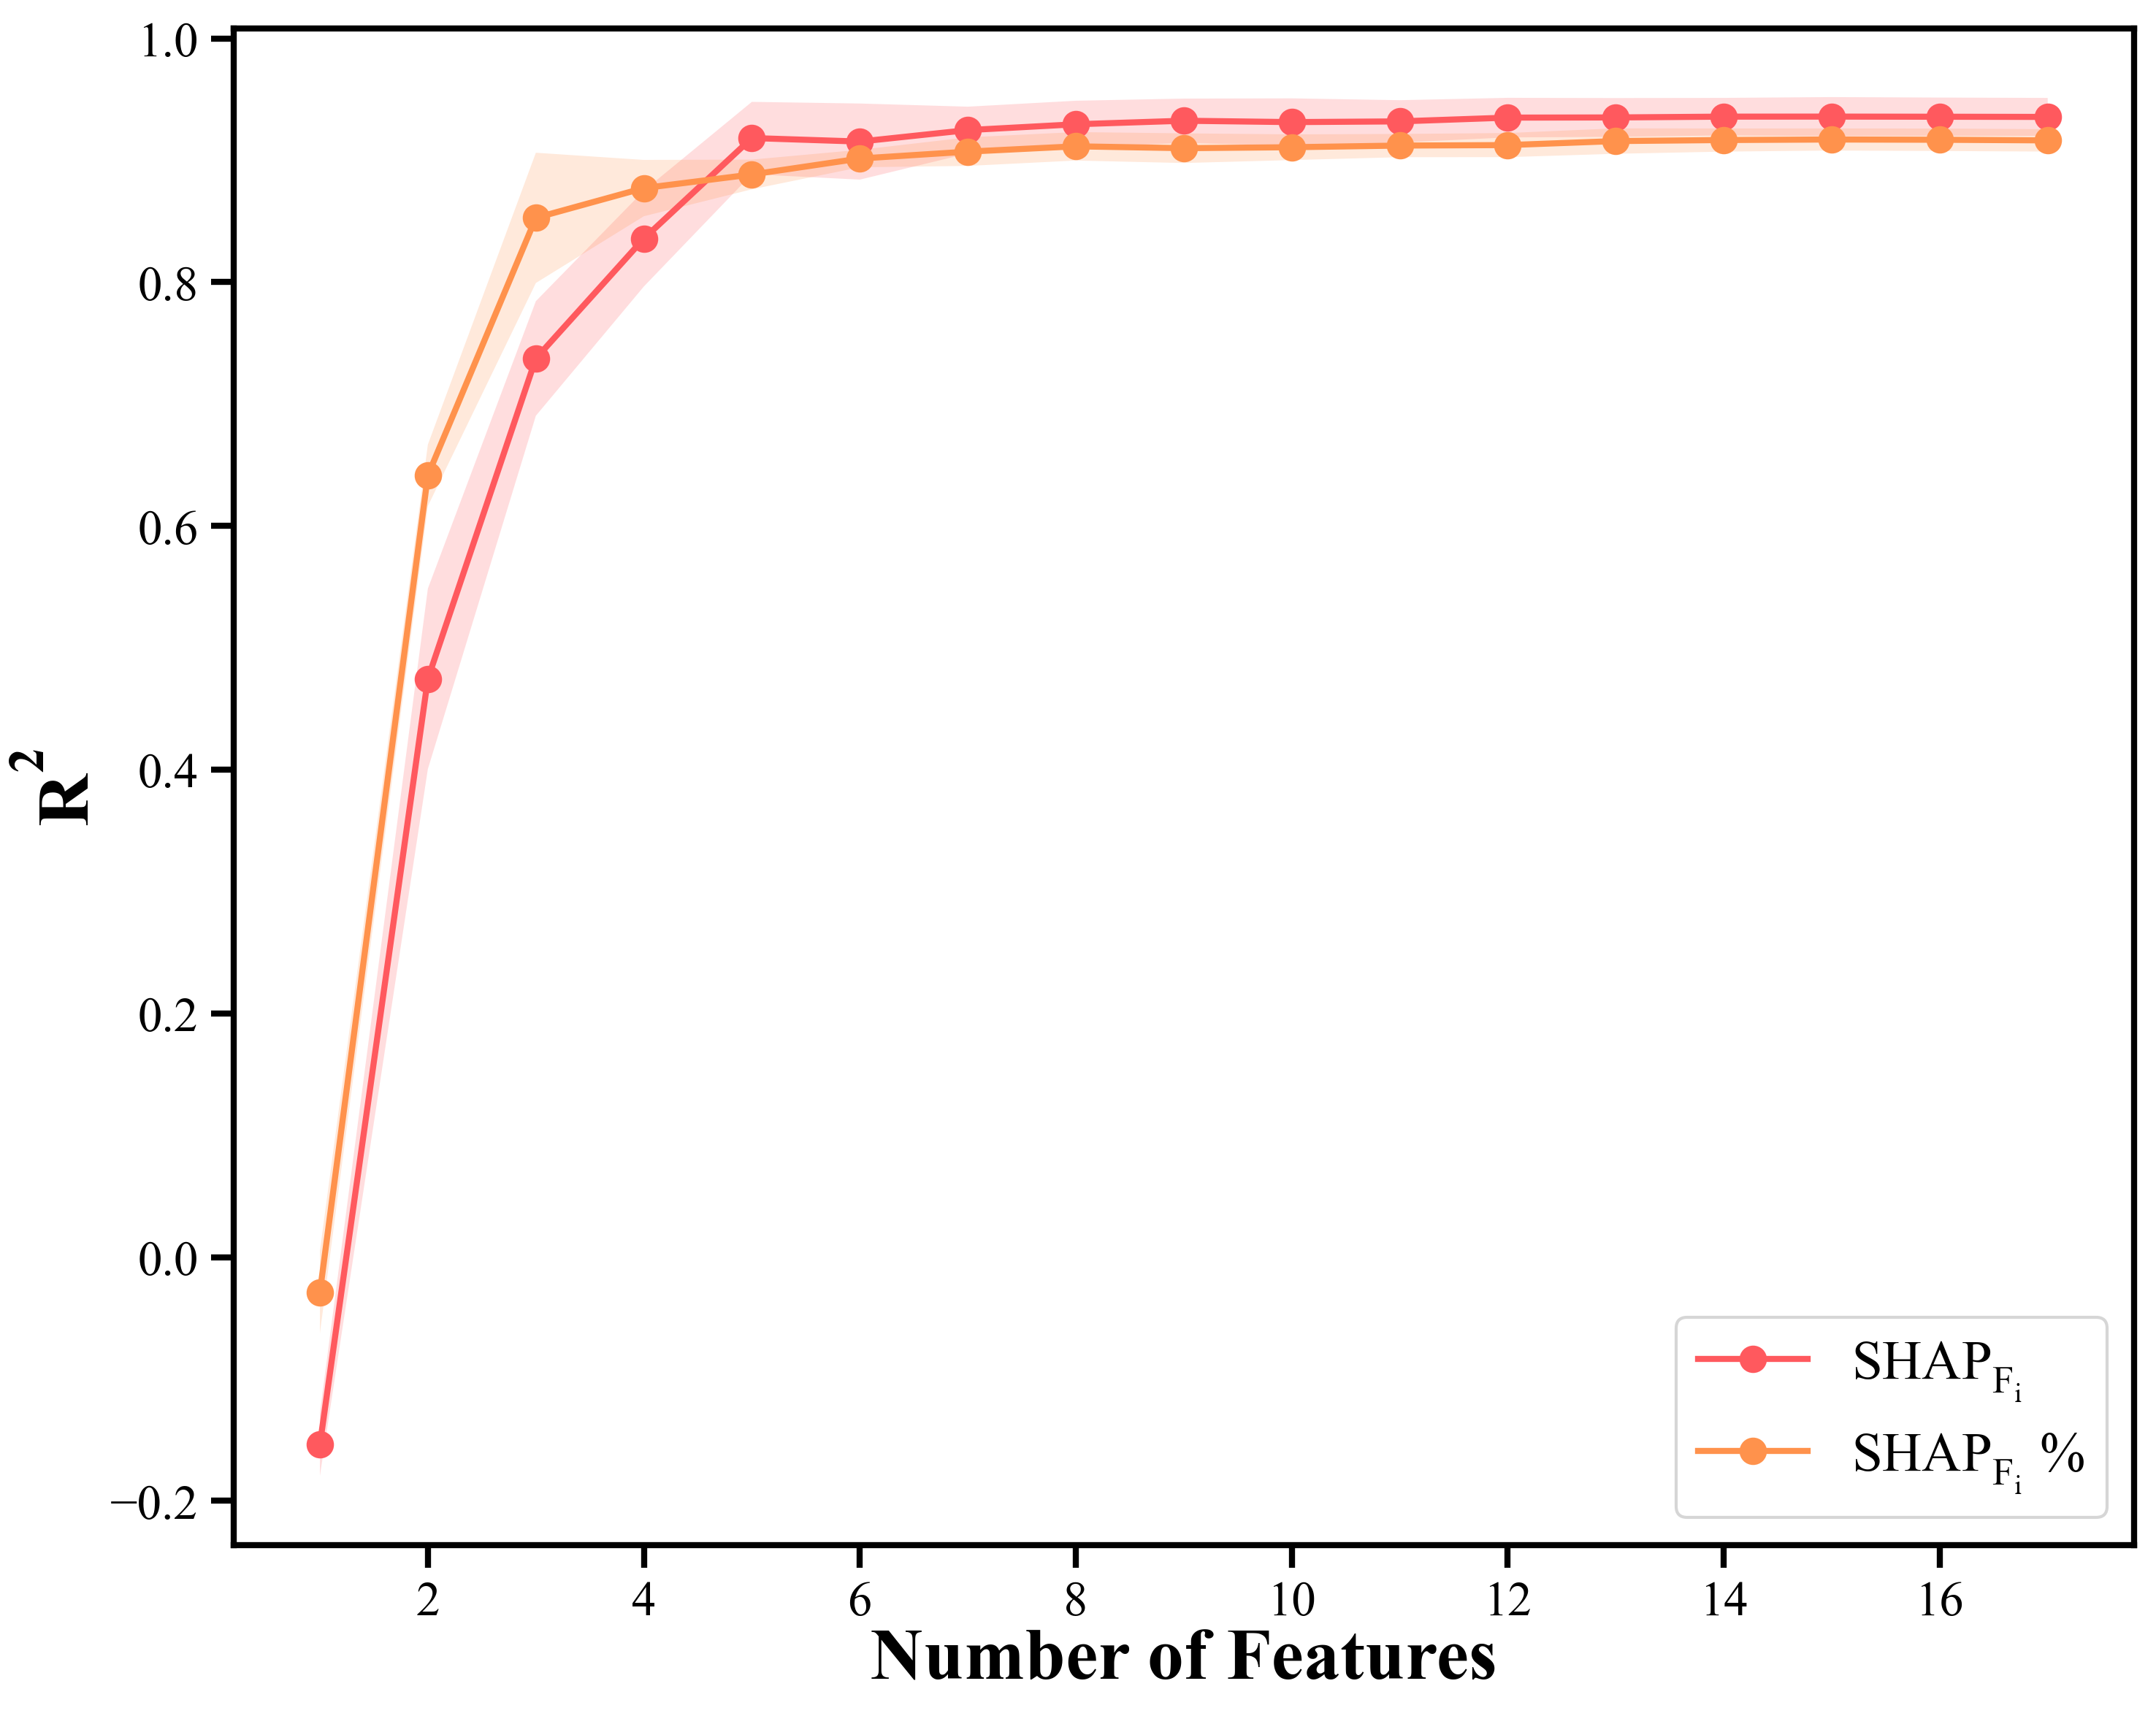

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))

# "SHAP_feat",
# "SHAP_feat_ratio",

select_cols = ["SHAP_feat_boxcox"] + X_cols
exp_df = df[select_cols].copy()
print("Used cols", exp_df.columns.tolist())
X = exp_df[X_cols]
y = exp_df["SHAP_feat_boxcox"]
model = RandomForestRegressor(n_estimators=500, random_state=42)
selector1, scores1 = plot_rfecv(X, y, model)
selector1_features = X.columns[selector1.support_]
print("Selected features:", selector1_features.tolist())
print("Number of selected features:", len(selector1_features))
np.save("results/feature_selection_scores-2-3.npy", scores1)

select_cols = ["SHAP_feat_ratio_boxcox"] + X_cols
exp_df = df[select_cols].copy()
print("Used cols", exp_df.columns.tolist())
X = exp_df[X_cols]
y = exp_df["SHAP_feat_ratio_boxcox"]
model = RandomForestRegressor(n_estimators=500, random_state=42)
selector2, scores2 = plot_rfecv(X, y, model)
selector2_features = X.columns[selector2.support_]
print("Selected features:", selector2_features.tolist())
print("Number of selected features:", len(selector2_features))
np.save("results/feature_selection_scores-2-4.npy", scores2)

# plt.ylim(0.8, 1)
plt.xlabel('Number of Features')
plt.ylabel(r'$R^2$')
ax.plot(range(1, len(scores1['mean_test_score']) + 1), scores1['mean_test_score'], marker="o")
ax.plot(range(1, len(scores2['mean_test_score']) + 1), scores2['mean_test_score'], marker="o")
plt.legend([r"$SHAP_{F_i}$", r"$SHAP_{F_i}$ %"], loc='lower right', fontsize=18)
std_scores = scores1['std_test_score']
ax.fill_between(range(1, len(scores1['mean_test_score']) + 1),
                scores1['mean_test_score'] - std_scores,
                scores1['mean_test_score'] + std_scores, alpha=0.2)
std_scores = scores2['std_test_score']
ax.fill_between(range(1, len(scores2['mean_test_score']) + 1),
                scores2['mean_test_score'] - std_scores,
                scores2['mean_test_score'] + std_scores, alpha=0.2)
plt.tight_layout()
plt.savefig("plots/feature_selection-2-2.png", dpi=300, bbox_inches='tight')
plt.show()

In [18]:
selector1_features = set(selector1_features)
selector2_features = set(selector2_features)
print("Common features:", list(selector1_features & selector2_features))
print("len common features:", len(selector1_features & selector2_features))

Common features: ['Corr_kendall_matrix', 'DCC_spearman_matrix', 'Corr_spearman_matrix', 'Corr_js_corr_matrix', 'DCC_wd_corr_matrix', 'Corr_pearson_matrix', 'DCC_pearson_matrix', 'DCC_xi_matrix', 'Corr_dcor_matrix', 'Corr_mutual_info_matrix', 'Corr_xi_matrix', 'Corr_wd_corr_matrix', 'DCC_dcor_matrix', 'DCC_mutual_info_matrix', 'DCC_js_corr_matrix']
len common features: 15
